# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [55]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
citipyReturn = ""
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    citipyReturn = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = citipyReturn.city_name
    country = citipyReturn.country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())


# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
#Create Data frame
cities_df = pd.DataFrame({"City": cities})

#Add all the columns we're going to want
cities_df["Country"] = countries
cities_df["Cloudiness"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Min Temp"] = ""
cities_df["Wind Speed"] = ""

weather_api_url = "https://api.openweathermap.org/data/2.5/weather"

params = {
    "APPID" : weather_api_key,
    "units" : "imperial"
}

#Loop through each entry and add weather data
for index, city in cities_df.iterrows():
    params["q"] = f"{city['City']},{city['Country']}"

    response = requests.get(weather_api_url, params=params)
    weatherData = response.json()

    try:
        print(f"Adding weather data for {city['City']}")
        city["Lat"] = weatherData["coord"]['lat']
        city["Lng"] = weatherData["coord"]['lon']
        city["Cloudiness"] = weatherData["clouds"]["all"]
        city["Max Temp"] = weatherData["main"]["temp_max"]
        city["Min Temp"] = weatherData["main"]["temp_min"]
        city["Humidity"] = weatherData["main"]["humidity"]
        city["Date"] = weatherData["dt"]
        city["Wind Speed"] = weatherData['wind']['speed']

    except:
        print(f"City {city['City']} not found on openweathermap api, skipping...")


cities_df

Adding weather data for ribeira grande
Adding weather data for dikson
Adding weather data for koygorodok
Adding weather data for jamestown
Adding weather data for prieska
Adding weather data for raga
City raga not found on openweathermap api, skipping...
Adding weather data for ponta do sol
Adding weather data for badou
Adding weather data for longjiang
Adding weather data for mar del plata
Adding weather data for rikitea
Adding weather data for puerto narino
Adding weather data for marawi
Adding weather data for hermanus
Adding weather data for roma
Adding weather data for ambilobe
Adding weather data for san jeronimo
Adding weather data for troitsko-pechorsk
Adding weather data for batemans bay
Adding weather data for narsaq
Adding weather data for cabo san lucas
Adding weather data for samarai
Adding weather data for busselton
Adding weather data for rock sound
Adding weather data for illoqqortoormiut
City illoqqortoormiut not found on openweathermap api, skipping...
Adding weather 

Adding weather data for mindelo
Adding weather data for sao filipe
Adding weather data for thompson
Adding weather data for alice springs
Adding weather data for livingston
Adding weather data for madhipura
Adding weather data for tianmen
Adding weather data for tuysarkan
City tuysarkan not found on openweathermap api, skipping...
Adding weather data for mincivan
Adding weather data for imbituba
Adding weather data for marfino
Adding weather data for tucuman
Adding weather data for port victoria
Adding weather data for namatanai
Adding weather data for agadez
Adding weather data for tasiilaq
Adding weather data for oranjemund
Adding weather data for karratha
Adding weather data for port lincoln
Adding weather data for alihe
Adding weather data for skibbereen
Adding weather data for lorengau
Adding weather data for bundu
Adding weather data for port blair
Adding weather data for geraldton
Adding weather data for jiuquan
Adding weather data for conakry
Adding weather data for buala
Addin

Adding weather data for sofiysk
City sofiysk not found on openweathermap api, skipping...
Adding weather data for pangnirtung
Adding weather data for kantemirovka
Adding weather data for chimore
Adding weather data for requena
City requena not found on openweathermap api, skipping...
Adding weather data for baghdad
Adding weather data for artyk
City artyk not found on openweathermap api, skipping...
Adding weather data for parfenyevo
Adding weather data for yining
Adding weather data for saint-augustin
Adding weather data for mount darwin
Adding weather data for padang
Adding weather data for waingapu
Adding weather data for gorno-chuyskiy
City gorno-chuyskiy not found on openweathermap api, skipping...
Adding weather data for miraflores
Adding weather data for rumonge
Adding weather data for santa cruz de tenerife
Adding weather data for touros
Adding weather data for ola
Adding weather data for jalingo
Adding weather data for denpasar
Adding weather data for manutuke
Adding weather d

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Wind Speed
0,ribeira grande,PT,100,1579999970,73,38.52,-28.7,54.55,54.55,4.36
1,dikson,RU,100,1580000107,97,73.51,80.55,-7.56,-7.56,6.6
2,koygorodok,RU,100,1580000108,96,60.45,51,7.5,7.5,2.13
3,jamestown,SH,95,1580000108,75,-15.94,-5.72,74.93,74.93,14.74
4,prieska,ZA,0,1580000109,47,-29.66,22.75,69.51,69.51,10.13
...,...,...,...,...,...,...,...,...,...,...
609,krasnyy chikoy,RU,0,1580000364,84,50.36,108.75,0.27,0.27,1.39
610,ha giang,VN,71,1580000364,85,22.83,104.98,44.74,44.74,3.51
611,tateyama,JP,75,1580000365,86,34.98,139.87,39.99,37,4.7
612,khash,IR,0,1580000365,74,28.22,61.22,43.75,43.75,3.94


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Wind Speed
0,ribeira grande,PT,100.0,1579999970,73,38.52,-28.7,54.55,54.55,4.36
1,dikson,RU,100.0,1580000107,97,73.51,80.55,-7.56,-7.56,6.6
2,koygorodok,RU,100.0,1580000108,96,60.45,51,7.5,7.5,2.13
3,jamestown,SH,95.0,1580000108,75,-15.94,-5.72,74.93,74.93,14.74
4,prieska,ZA,0.0,1580000109,47,-29.66,22.75,69.51,69.51,10.13
...,...,...,...,...,...,...,...,...,...,...
609,krasnyy chikoy,RU,0.0,1580000364,84,50.36,108.75,0.27,0.27,1.39
610,ha giang,VN,71.0,1580000364,85,22.83,104.98,44.74,44.74,3.51
611,tateyama,JP,75.0,1580000365,86,34.98,139.87,39.99,37,4.7
612,khash,IR,0.0,1580000365,74,28.22,61.22,43.75,43.75,3.94


In [57]:
#Replace all empty string rows with nans in one column
cities_df["Cloudiness"].replace("", np.nan, inplace=True)
#Drop all rows with a nan
cities_df = cities_df.dropna()

cities_df.to_csv("../output_data/cities.csv", index=False)

In [58]:
cities_df

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Wind Speed
0,ribeira grande,PT,100.0,1579999970,73,38.52,-28.7,54.55,54.55,4.36
1,dikson,RU,100.0,1580000107,97,73.51,80.55,-7.56,-7.56,6.6
2,koygorodok,RU,100.0,1580000108,96,60.45,51,7.5,7.5,2.13
3,jamestown,SH,95.0,1580000108,75,-15.94,-5.72,74.93,74.93,14.74
4,prieska,ZA,0.0,1580000109,47,-29.66,22.75,69.51,69.51,10.13
...,...,...,...,...,...,...,...,...,...,...
609,krasnyy chikoy,RU,0.0,1580000364,84,50.36,108.75,0.27,0.27,1.39
610,ha giang,VN,71.0,1580000364,85,22.83,104.98,44.74,44.74,3.51
611,tateyama,JP,75.0,1580000365,86,34.98,139.87,39.99,37,4.7
612,khash,IR,0.0,1580000365,74,28.22,61.22,43.75,43.75,3.94


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Wind Speed
40,chivay,PE,83.0,1580000123,77,-15.64,-71.6,44.73,44.73,6.8


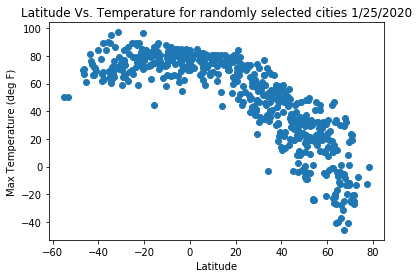

In [65]:
date = "1/25/2020"
ax = plt.scatter(cities_df["Lat"], cities_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (deg F)")
plt.title(f"Latitude Vs. Temperature for randomly selected cities {date}")

#Weird there is one city near the equator that's suprisingly cold?  
# What is it?

cities_copy = cities_df.loc[cities_df["Lat"] > -20]
cities_copy = cities_copy.loc[cities_copy["Lat"] < 0]
cities_copy = cities_copy.loc[cities_copy["Max Temp"] == cities_copy["Max Temp"].min()]

cities_copy

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude Vs. Humidity for randomly selected cities 1/25/2020')

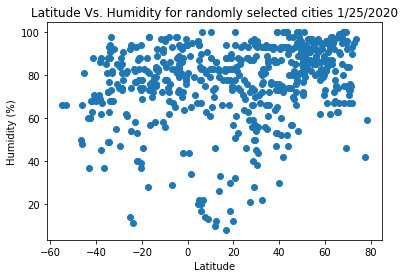

In [73]:
date = "1/25/2020"
ax = plt.scatter(cities_df["Lat"], cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude Vs. Humidity for randomly selected cities {date}")


#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude Vs. Cloudiness for randomly selected cities 1/25/2020')

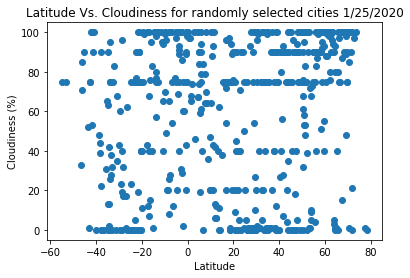

In [75]:
date = "1/25/2020"
ax = plt.scatter(cities_df["Lat"], cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude Vs. Cloudiness for randomly selected cities {date}")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude Vs. Wind Speed for randomly selected cities 1/25/2020')

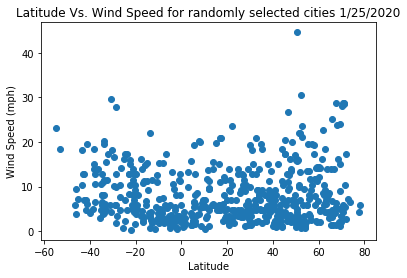

In [76]:
date = "1/25/2020"
ax = plt.scatter(cities_df["Lat"], cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude Vs. Wind Speed for randomly selected cities {date}")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


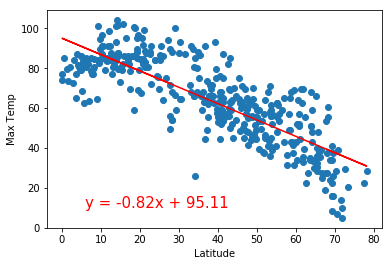

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


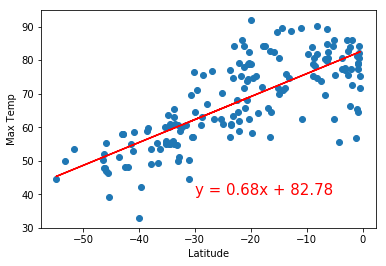

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


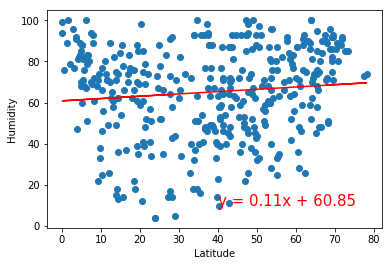

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


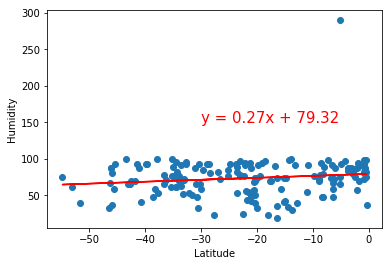

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


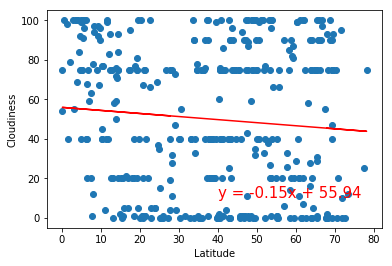

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


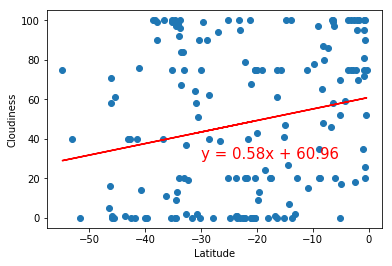

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


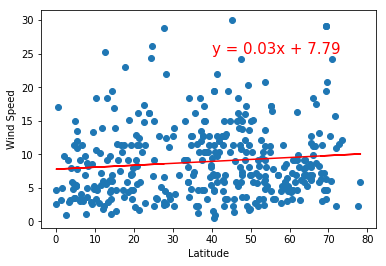

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


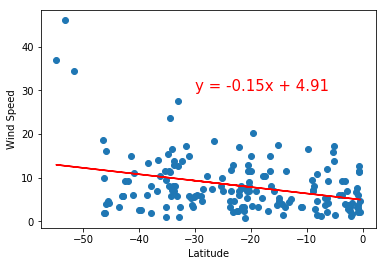